In [27]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Load the data
data = pd.read_csv('EURINR=X.csv', parse_dates=True, index_col='Date')

# Display the first few rows of the data
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0
2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0
2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0
2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0
2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0


In [28]:
# Step 2: Calculate Moving Average (MA) for one day (1-day MA)
data['1_day_MA'] = data['Close'].rolling(window=1).mean()

# Step 3: Calculate Moving Average (MA) for one week (5-day MA, assuming 5 trading days in a week)
data['1_week_MA'] = data['Close'].rolling(window=5).mean()

# Display the updated dataframe with the new columns
data.head()


,Open,High,Low,Close,Adj Close,Volume,1_day_MA,1_week_MA
Date,,,,,,,,
2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0,88.482002,NaN
2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0,88.300003,NaN
2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0,87.219002,NaN
2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0,87.605003,NaN
2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0,86.827003,87.686603


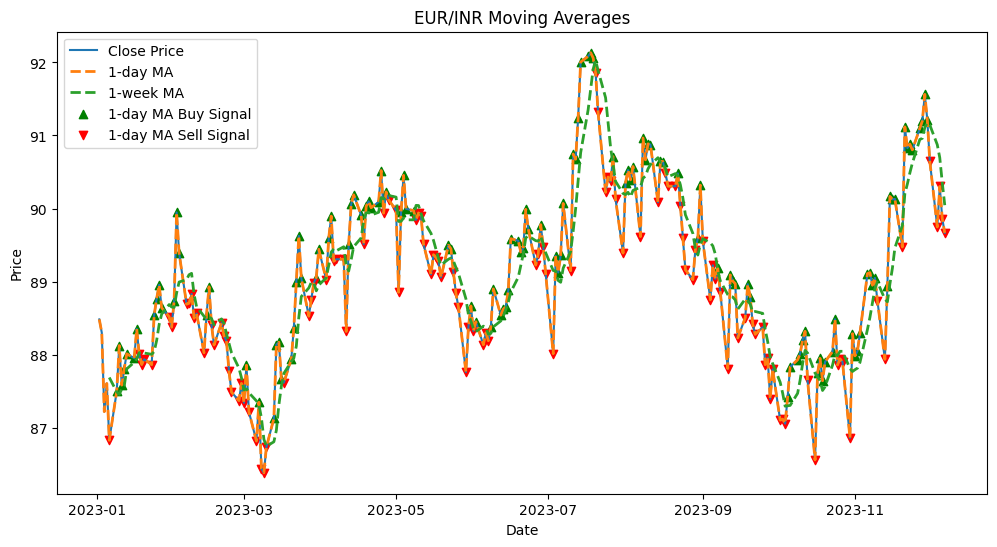

In [29]:
# Making decision from Moving Averages
data['1_day_MA_Signal'] = 'NEUTRAL'
data.loc[(data['Close'] > data['1_week_MA']) & (data['1_day_MA'] > data['1_week_MA']), '1_day_MA_Signal'] = 'BUY'
data.loc[(data['Close'] < data['1_week_MA']) & (data['1_day_MA'] < data['1_week_MA']), '1_day_MA_Signal'] = 'SELL'

# Visualize Moving Averages decisions
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['1_day_MA'], label='1-day MA', linestyle='--', linewidth=2)
plt.plot(data['1_week_MA'], label='1-week MA', linestyle='--', linewidth=2)
plt.scatter(data.index[data['1_day_MA_Signal'] == 'BUY'], data['Close'][data['1_day_MA_Signal'] == 'BUY'], label='1-day MA Buy Signal', marker='^', color='g')
plt.scatter(data.index[data['1_day_MA_Signal'] == 'SELL'], data['Close'][data['1_day_MA_Signal'] == 'SELL'], label='1-day MA Sell Signal', marker='v', color='r')
plt.title('EUR/INR Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [30]:
# Step 3: Calculate Bollinger Bands
data['std'] = data['Close'].rolling(window=20).std()  # Standard deviation
data['upper_band'] = data['1_week_MA'] + 2 * data['std']
data['lower_band'] = data['1_week_MA'] - 2 * data['std']
data.head()

,Open,High,Low,Close,Adj Close,Volume,1_day_MA,1_week_MA,1_day_MA_Signal,std,upper_band,lower_band
Date,,,,,,,,,,,,
2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0,88.482002,NaN,NEUTRAL,NaN,NaN,NaN
2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0,88.300003,NaN,NEUTRAL,NaN,NaN,NaN
2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0,87.219002,NaN,NEUTRAL,NaN,NaN,NaN
2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0,87.605003,NaN,NEUTRAL,NaN,NaN,NaN
2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0,86.827003,87.686603,SELL,NaN,NaN,NaN


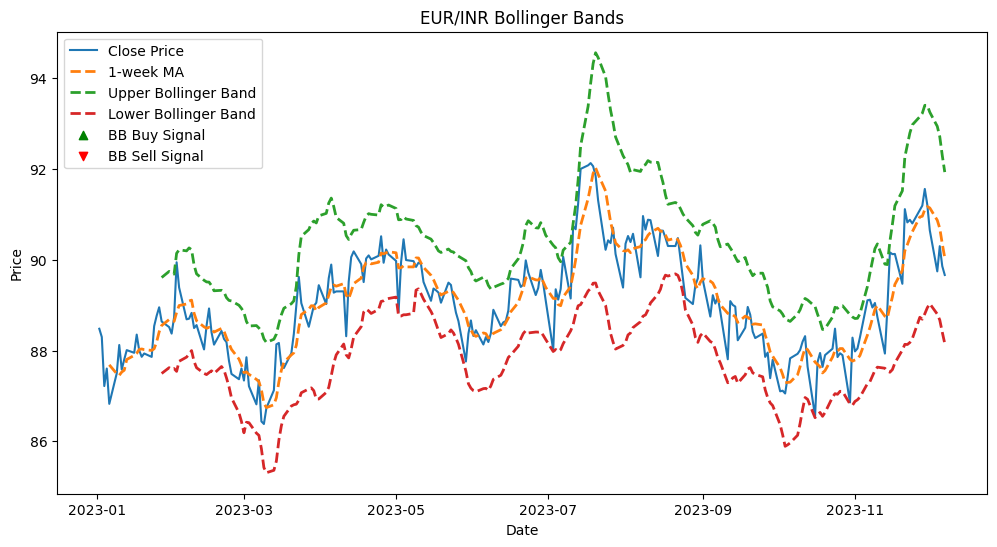

In [31]:
# Making decision from Bollinger Bands
data['BB_Signal'] = 'NEUTRAL'
data.loc[data['Close'] > data['upper_band'], 'BB_Signal'] = 'SELL'
data.loc[data['Close'] < data['lower_band'], 'BB_Signal'] = 'BUY'

# Visualize Bollinger Bands decisions
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['1_week_MA'], label='1-week MA', linestyle='--', linewidth=2)
plt.plot(data['upper_band'], label='Upper Bollinger Band', linestyle='--', linewidth=2)
plt.plot(data['lower_band'], label='Lower Bollinger Band', linestyle='--', linewidth=2)
plt.scatter(data.index[data['BB_Signal'] == 'BUY'], data['Close'][data['BB_Signal'] == 'BUY'], label='BB Buy Signal', marker='^', color='g')
plt.scatter(data.index[data['BB_Signal'] == 'SELL'], data['Close'][data['BB_Signal'] == 'SELL'], label='BB Sell Signal', marker='v', color='r')
plt.title('EUR/INR Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

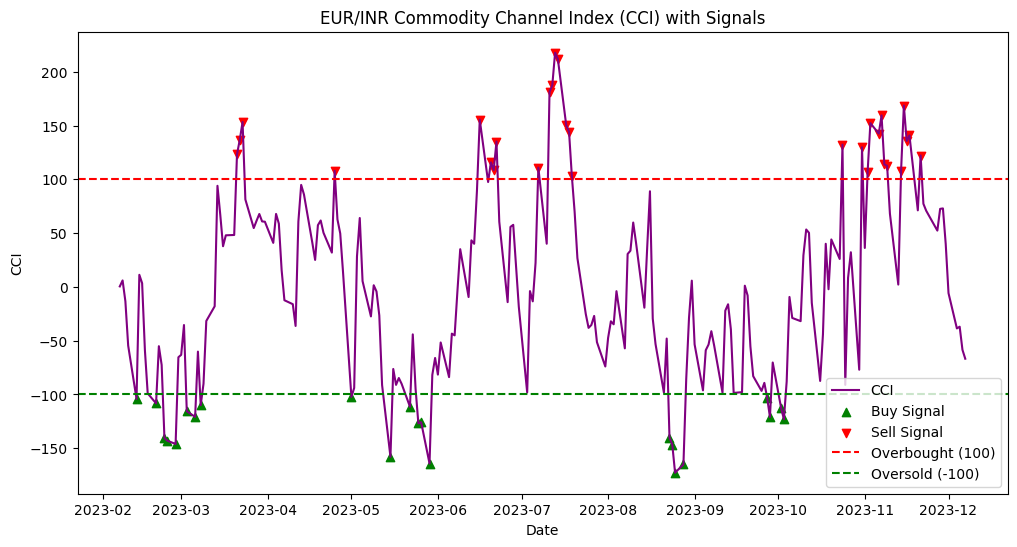

In [34]:
# Step 4: Calculate Commodity Channel Index (CCI)
typical_price = (data['High'] + data['Low'] + data['Close']) / 3
mean_deviation = abs(typical_price - typical_price.rolling(window=14).mean())
cci = (typical_price - typical_price.rolling(window=14).mean()) / (0.015 * mean_deviation.rolling(window=14).mean())
data['CCI'] = cci

# Step 5: Make Trading Decisions from CCI
data['CCI_Signal'] = 'NEUTRAL'
data.loc[data['CCI'] > 100, 'CCI_Signal'] = 'SELL'
data.loc[data['CCI'] < -100, 'CCI_Signal'] = 'BUY'

# Visualize CCI Signals
plt.figure(figsize=(12, 6))
plt.plot(data['CCI'], label='CCI', color='purple')
plt.scatter(data.index[data['CCI_Signal'] == 'BUY'], data['CCI'][data['CCI_Signal'] == 'BUY'], marker='^', color='g', label='Buy Signal')
plt.scatter(data.index[data['CCI_Signal'] == 'SELL'], data['CCI'][data['CCI_Signal'] == 'SELL'], marker='v', color='r', label='Sell Signal')
plt.axhline(100, color='r', linestyle='--', label='Overbought (100)')
plt.axhline(-100, color='g', linestyle='--', label='Oversold (-100)')
plt.title('EUR/INR Commodity Channel Index (CCI) with Signals')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend()
plt.show()

In [35]:
# Creating final table
data['MA_Signal'] = 'NEUTRAL'
data.loc[(data['Close'] > data['1_week_MA']), 'MA_Signal'] = 'BUY'
data.loc[(data['Close'] < data['1_week_MA']), 'MA_Signal'] = 'SELL'

data['BB_Signal'] = 'NEUTRAL'
data.loc[data['Close'] > data['upper_band'], 'BB_Signal'] = 'SELL'
data.loc[data['Close'] < data['lower_band'], 'BB_Signal'] = 'BUY'

data['CCI_Signal'] = 'NEUTRAL'
data.loc[data['CCI'] > 100, 'CCI_Signal'] = 'SELL'
data.loc[data['CCI'] < -100, 'CCI_Signal'] = 'BUY'

# Create a DataFrame for the decision table
decision_table = pd.DataFrame({
    'Date': data.index,
    'MA_Signal': data['MA_Signal'],
    'BB_Signal': data['BB_Signal'],
    'CCI_Signal': data['CCI_Signal']
})

# Export the decision table to a CSV file
decision_table.to_csv('decision_table.csv', index=False)

In [37]:
import pandas as pd

# Read the decision table from the CSV file
decision_table = pd.read_csv('decision_table.csv')

# Create CSV files for each indicator's decision table
decision_table[['Date', 'MA_Signal']].to_csv('ma_decision_table.csv', index=False)
decision_table[['Date', 'BB_Signal']].to_csv('bb_decision_table.csv', index=False)
decision_table[['Date', 'CCI_Signal']].to_csv('cci_decision_table.csv', index=False)

